In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import dotenv_values

In [2]:
config = dotenv_values()

pg_user = config['POSTGRES_USER']
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']

In [3]:
# updating the url
url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

# creating the engine
engine = create_engine(url, echo=False)

In [4]:
df = pd.read_sql_table('table_metro_key', con=engine, schema= pg_schema)

In [9]:
df.head()

,topic,topic_name,category,key_category,count,percentage
112,2,2_dr_dentist_office_dental,Shopping,Shopping,3527,56.055308
113,2,2_dr_dentist_office_dental,Health & Medical,Health & Medical,1380,21.932613
114,2,2_dr_dentist_office_dental,other,other,1089,17.307692
115,2,2_dr_dentist_office_dental,Beauty & Spas,Beauty & Spas,182,2.892562
116,2,2_dr_dentist_office_dental,Restaurants,Restaurants,71,1.128417


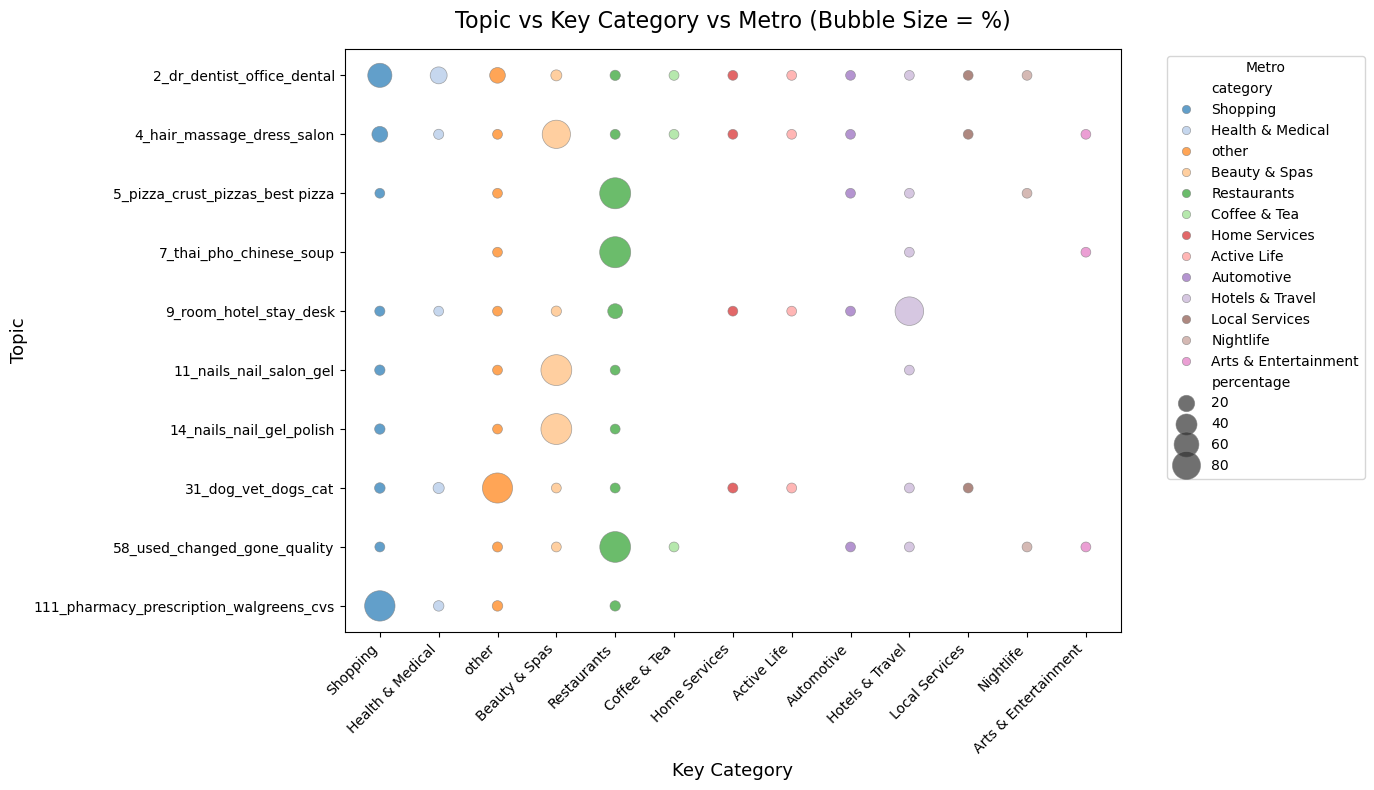

In [5]:
#Unify category
df['category'] = df['category'].fillna(df['key_category'])

#Remove rows where either key_category or metro is null (since we want both)
df = df.dropna(subset=['key_category', 'category'])  # category = metro in that case

#Create bubble chart
plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=df,
    x='key_category',
    y='topic_name',
    size='percentage',
    hue='category',  # this is metro
    sizes=(50, 500),
    alpha=0.7,
    palette='tab20',
    edgecolor='gray',
    linewidth=0.5
)

#Styling
plt.title("Topic vs Key Category vs Metro (Bubble Size = %)", fontsize=16, pad=15)
plt.xlabel("Key Category", fontsize=13)
plt.ylabel("Topic", fontsize=13)
plt.legend(title="Metro", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()